Mount da Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Imports de libraries

In [1]:
import os
import pandas as pd
import numpy as np
import joblib
import math
import decimal
import matplotlib.pyplot as plt


Definição de Constantes

In [7]:
MAIN_PATH = '/content/drive/MyDrive/'

TOTAL_FUNDS_DEFAULT = 50.0

Invocar notebooks de funções e de constantes

In [8]:
functions_path = MAIN_PATH + 'Colab Notebooks/Bet_Functions.ipynb'

%run '{functions_path}'


Obter parametros

In [9]:
if not 'param_league' in locals():
    param_league = 'Liga_Portugal'
if not 'param_league_short' in locals():
    param_league_short = 'lp'
if not 'param_season' in locals():
    param_season = '_2023_24'
if not 'param_final_flag' in locals():
    param_final_flag = False
if not 'param_odd_bet_limit' in locals():
    param_odd_bet_limit = 1.2
if not 'param_number_matches_week' in locals():
    param_number_matches_week = 9
if not 'param_itera_jornada' in locals():
    param_itera_jornada = 2
if not 'param_predicts_path' in locals():
    param_predicts_path = ''

main_path_league  = MAIN_PATH + 'Data_Football/{0}/'.format(param_league)

if param_predicts_path == '' :
  summary_path = main_path_league + 'Predicts/Summary_{0}{1}.csv'.format(param_league_short,param_season)
else:
  summary_path = param_predicts_path + '/Summary_{0}{1}.csv'.format(param_league_short,param_season)

print('summary_path =' + summary_path)

summary_path =/content/drive/MyDrive/Data_Football/Liga_Portugal/Predicts/Summary_lp_2023_24.csv


Abrir CSV Summary

In [10]:
df_summary_final=pd.read_csv(summary_path)

max_x = df_summary_final.game_week.max() + 1
min_x = df_summary_final.game_week.min() -1

max_y = max(df_summary_final.percent_return_on_bet.max(), df_summary_final.percent_total_return.max()) + 20
min_y = min(df_summary_final.percent_return_on_bet.min(), df_summary_final.percent_total_return.min()) - 10

df_summary_final



,game_week,game_week_winning,bet_size,total_funds_allocated,total_funds,total_funds_final,percent_return_on_bet,percent_total_return,number_bets,number_win_bets,percent_winning_bets
0,2,-2.45,1.0,0.0,0.00,0.00,-24.50,0.00,9,2,22.22
1,3,-7.00,1.0,0.0,0.00,0.00,-70.00,0.00,9,3,33.33
2,4,0.95,1.0,0.0,0.00,0.00,9.50,0.00,9,3,33.33
3,5,-1.91,1.0,0.0,0.00,0.00,-19.10,0.00,9,4,44.44
4,6,6.19,1.0,0.0,0.00,0.00,61.90,0.00,9,7,77.78
5,7,-5.86,1.0,0.0,0.00,0.00,-58.60,0.00,9,2,22.22
6,8,2.71,1.0,0.0,0.00,0.00,27.10,0.00,9,6,66.67
7,9,-3.29,1.0,0.0,0.00,0.00,-32.90,0.00,9,3,33.33
8,10,-1.99,1.0,0.0,0.00,0.00,-19.90,0.00,9,4,44.44
9,11,5.80,1.0,0.0,0.00,0.00,58.00,0.00,9,6,66.67


Imprimir grafico

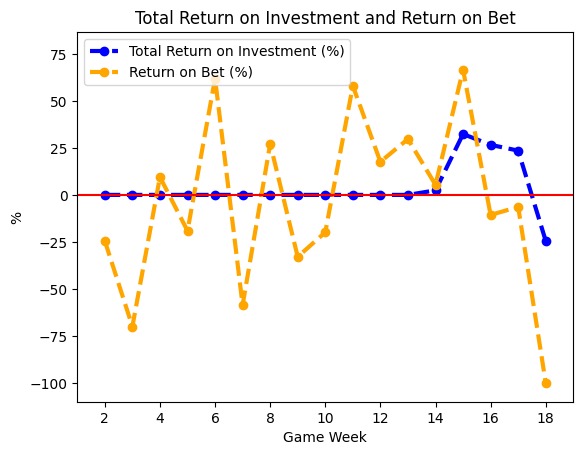

In [11]:
# setting x and y axis range
plt.ylim(min_y,max_y)
plt.xlim(min_x,max_x)

# naming the x axis
plt.xlabel('Game Week')
# naming the y axis
plt.ylabel('%')

# giving a title to my graph
plt.title('Total Return on Investment and Return on Bet')

# plotting totla return
plt.plot(df_summary_final.game_week, df_summary_final.percent_total_return, color='blue', linestyle='dashed', linewidth = 3,
         marker='o',  label  = 'Total Return on Investment (%)')

# plotting percente return on bet
plt.plot(df_summary_final.game_week, df_summary_final.percent_return_on_bet, color='orange', linestyle='dashed', linewidth = 3,
         marker='o',  label = 'Return on Bet (%)')

plt.axhline(y=0, color='r', linestyle='-')


plt.legend(loc="upper left")

# function to show the plot
plt.show()